In [ ]:
!pip install apache-airflow==2.3.0 --constraint "https://raw.githubusercontent.com/apache/airflow/constraints-2.3.0/constraints-no-providers-3.7.txt"
!airflow db init

import airflow
from airflow import DAG
from airflow.operators.empty import EmptyOperator  # Updated import here
from datetime import datetime

# Set up the default arguments for the DAG
default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'email': ['airflow@example.com'],
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
}

# Define the DAG
dag = DAG(
    'test_dag',
    default_args=default_args,
    description='A simple tutorial DAG',
    schedule_interval='@daily',
    start_date=datetime(2021, 1, 1),
    catchup=False,
)

# Define the tasks
start = EmptyOperator(
    task_id='start',
    dag=dag,
)

end = EmptyOperator(
    task_id='end',
    dag=dag,
)

start >> end

# Print the list of tasks in the DAG
print("DAG Tasks:")
for task in dag.tasks:
    print(task.task_id)

# Start the scheduler (in a very basic form for testing)
!airflow scheduler


DB: sqlite:////root/airflow/airflow.db
[2024-07-04 01:19:08,854] {db.py:1410} INFO - Creating tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
/usr/local/lib/python3.10/dist-packages/requests/__init__.py:102 RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
INFO  [alembic.runtime.migration] Running upgrade 849da589634d -> 2c6edca13270, Resource based permissions.
[2024-07-04 01:19:09,786] {manager.py:807} WARNING - No user yet created, use flask fab command to do it.
[2024-07-04 01:19:10,923] {manager.py:508} INFO - Created Permission View: can read on DAG Runs
[2024-07-04 01:19:10,947] {manager.py:508} INFO - Created Permission View: can read on Task Instances
[2024-07-04 01:19:10,991] {manager.py:508} INFO - Created Permission View: can edit on Task Instances
[2024-07-04 01:19:11,021] {manager.py:508} INFO - Created Permissi

In [ ]:
!pip install pyspark
!pip install delta-spark

from pyspark.sql import SparkSession
from delta import *

builder = SparkSession.builder \
    .appName("DeltaLakeExample") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")
spark = configure_spark_with_delta_pip(builder).getOrCreate()


In [ ]:
data = [("John", 1), ("Jane", 2), ("Doe", 3)]
columns = ["Name", "ID"]
df = spark.createDataFrame(data, columns)
df.show()


[2024-07-04 01:58:50,197] {utils.py:161} INFO - NumExpr defaulting to 2 threads.
+----+---+
|Name| ID|
+----+---+
|John|  1|
|Jane|  2|
| Doe|  3|
+----+---+



In [ ]:

path = "/content/delta-table"
df.write.format("delta").save(path)


In [ ]:
df = spark.read.format("delta").load(path)

# Quality check: count missing values
from pyspark.sql.functions import col
df.filter(col("Name").isNull() | col("ID").isNull()).show()

# Quality check: find duplicates
df.groupBy("Name").count().filter("count > 1").show()


+----+---+
|Name| ID|
+----+---+
+----+---+

+----+-----+
|Name|count|
+----+-----+
+----+-----+



In [ ]:
# Example of a simple DAG script part
def check_data_quality():
    df = spark.read.format("delta").load(path)
    missing_values = df.filter(col("Name").isNull() | col("ID").isNull()).count()
    return missing_values == 0

# Assume you set up Airflow somewhere else and this is a task in your DAG


In [ ]:
python -m venv airflow_venv
source airflow_venv/bin/activate


SyntaxError: invalid syntax (<ipython-input-7-5e710921f626>, line 1)

In [ ]:
from airflow import DAG
from airflow.operators.dummy_operator import DummyOperator
from airflow.utils.dates import days_ago

default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5),
}

dag = DAG(
    'example_dag',
    default_args=default_args,
    description='A simple tutorial DAG',
    schedule_interval=timedelta(days=1),
    start_date=days_ago(2),
)

start = DummyOperator(
    task_id='start',
    dag=dag,
)

end = DummyOperator(
    task_id='end',
    dag=dag,
)

start >> end


Records with future dates:
+----+---+----------+-----+---------+------+---+
|Name| ID|Department|Email|StartDate|Salary|Age|
+----+---+----------+-----+---------+------+---+
+----+---+----------+-----+---------+------+---+

Salary outliers:
+----+---+----------+-----+---------+------+---+
|Name| ID|Department|Email|StartDate|Salary|Age|
+----+---+----------+-----+---------+------+---+
+----+---+----------+-----+---------+------+---+



<Figure size 1000x500 with 0 Axes>

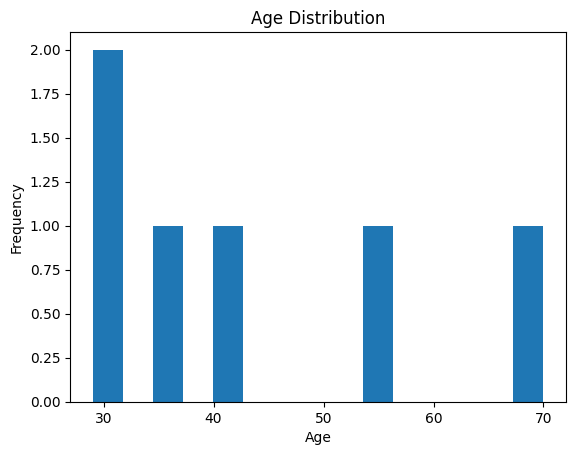

<Figure size 1000x500 with 0 Axes>

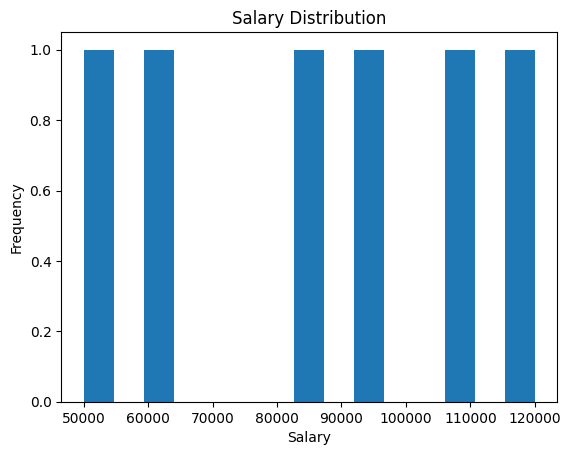

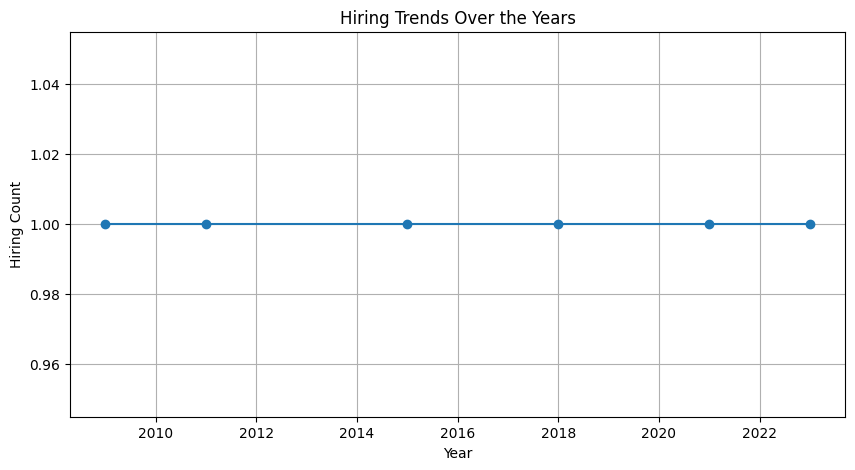

In [ ]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.types import BooleanType, DateType
from delta import *
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Spark Session with Delta Lake support
def create_spark_session():
    builder = SparkSession.builder \
        .appName("AdvancedSparkPipeline") \
        .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
        .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")
    return configure_spark_with_delta_pip(builder).getOrCreate()

# Load complex data into DataFrame
def load_data(spark):
    data = [
        ("John Doe", 1, "Sales", "john.doe@example.com", "2015-03-15", 60000, 30),
        ("Jane Smith", 2, "Engineering", "jane.smith@company.com", "2018-06-23", 85000, 29),
        ("Will Turner", 3, "Engineering", "will.turner@company.com", "2021-01-12", 95000, 35),
        ("Elizabeth Swan", 4, "Finance", "elizabeth.swan@finance", "2011-09-09", 120000, 40),
        ("Jack Sparrow", 5, "Finance", "jack.sparrow@pirate.com", "2023-07-01", 110000, 55),  # Future date
        ("Barbossa", 6, "Sales", "barbossa@example.com", "2009-04-30", 50000, 70)  # Age out of typical range
    ]
    columns = ["Name", "ID", "Department", "Email", "StartDate", "Salary", "Age"]
    df = spark.createDataFrame(data, schema=columns)
    df = df.withColumn("StartDate", F.col("StartDate").cast(DateType()))
    return df

# Quality checks
def validate_dates(df):
    today = F.current_date()
    return df.filter(F.col("StartDate") > today)

def detect_outliers(df, column):
    bounds = {
        c: dict(
            zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
        ) for c in [column]
    }
    for c in bounds:
        iqr = bounds[c]['q3'] - bounds[c]['q1']
        bounds[c]['lower_bound'] = bounds[c]['q1'] - (1.5 * iqr)
        bounds[c]['upper_bound'] = bounds[c]['q3'] + (1.5 * iqr)
    return df.filter(
        (F.col(column) < bounds[column]['lower_bound']) |
        (F.col(column) > bounds[column]['upper_bound'])
    )

# Visualizations
def plot_histogram(df, column, title):
    pd_df = df.select(column).toPandas()
    plt.figure(figsize=(10, 5))
    pd_df.hist(bins=15)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

def plot_time_series(df, date_column, title):
    time_data = df.groupBy(F.year(F.col(date_column)).alias('Year')).count().toPandas()
    time_data.sort_values('Year', inplace=True)
    plt.figure(figsize=(10, 5))
    plt.plot(time_data['Year'], time_data['count'], marker='o')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Hiring Count')
    plt.grid(True)
    plt.show()

# Main pipeline execution
def run_pipeline():
    spark = create_spark_session()

    # Load data
    df = load_data(spark)

    # Validate dates
    future_dates_df = validate_dates(df)
    print("Records with future dates:")
    future_dates_df.show()

    # Detect salary outliers
    salary_outliers_df = detect_outliers(df, "Salary")
    print("Salary outliers:")
    salary_outliers_df.show()

    # Plotting
    plot_histogram(df, "Age", "Age Distribution")
    plot_histogram(df, "Salary", "Salary Distribution")
    plot_time_series(df, "StartDate", "Hiring Trends Over the Years")

if __name__ == "__main__":
    run_pipeline()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count, regexp_extract
import matplotlib.pyplot as plt

# Initialize Spark Session with Delta Lake
spark = SparkSession.builder \
    .appName("AmazonDataQualityWithDelta") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .getOrCreate()

# Assuming Delta Lake is set up and delta-core is in your classpath

# Load Data
data_path = "/content/amazon.csv"
delta_table_path = "/mnt/delta/amazon_products"

# Read CSV to DataFrame
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Write to Delta Lake (can handle schema evolution and enforce schema)
df.write.format("delta").mode("overwrite").save(delta_table_path)

# Read from Delta Lake
df = spark.read.format("delta").load(delta_table_path)

# Data Quality Checks
# Check for null values
null_checks = df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns])
print("Null value counts per column:")
null_checks.show()

# Check for invalid price formats
invalid_prices = df.filter(~col("actual_price").rlike(r"^\â‚¹\d+$") | ~col("discounted_price").rlike(r"^\â‚¹\d+$"))
print("Rows with invalid price formats:")
invalid_prices.show()

# Check for duplicate product entries
duplicates = df.groupBy("product_id").count().filter("count > 1")
print("Duplicate products based on product_id:")
duplicates.show()

# Visualizations
# Rating distribution
ratings_pdf = df.select("rating").na.drop().toPandas()
plt.figure(figsize=(10, 6))
plt.hist(ratings_pdf['rating'], bins=30, color='blue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Discount percentage distribution
df = df.withColumn("discount_percentage", regexp_extract(col("discount_percentage"), r"(\d+)%", 1).cast("int"))
discounts_pdf = df.select("discount_percentage").na.drop().toPandas()
plt.figure(figsize=(10, 6))
plt.hist(discounts_pdf['discount_percentage'], bins=30, color='green', edgecolor='black')
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

# Cleanup Spark session
spark.stop()
